# Cuisine Analysis
---
## Goal
- Use Spoonacular API and the U.S. Department of Health and Human Services' 2015 Dietary Guidelines to evaluate the macronutrient profiles and accessibility for people with health-related dietary restrictions of a set cuisines.
## Questions
- What are the macronutrient profiles of certain cuisines?
- Which cuisines are most accessible to people with certain food intolerances/allergies?
- Is there a correlation between balanced macronutrient profiles and accessibility for people with certain food intolerances/allergies?
- Which cuisine is offers the most balanced macronutrient profile for an adult between the ages of 19-50, while being accessible to adults with food intolerances/allergies?
## Definitions
- "Macronutrient profiles": the ratio of the percentages of carbohydrates, protein, and fat on average for a servings of a recipe of a given cuisine
- "Accessibility": the percentage of recipes for a given cuisine that does not contain gluten or dairy
- "Balanced": description of a macronutrient profile that matches (within 5 percentage points) the recommended nutritional goals for carbohydrates, protein, and total fat for male and female adults ages 19-50
---

# DataFrame creation

In [5]:
# Dependencies and API key
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import scipy.stats
import json 
import requests

from API_key import API_key

In [6]:
#Retrieve 43 recipe IDs per cuisine (American, Chinese, Mexican)
cuisines = ["American", "Chinese", "Mexican"] 
recipe_data = []

base_url = "https://api.spoonacular.com/recipes/complexSearch"

number = 43

# for cuisine in cuisines:
for cuisine in cuisines:  
    target_url = f"{base_url}?apiKey={API_key}&cuisine={cuisine}&number={number}"
    
    recipe_info = requests.get(target_url).json()
    
# Parse out each ID in recipe batch
    for i in range(0, 43):
        recipe_id = recipe_info["results"][i]["id"]
        recipe_data.append({"ID": recipe_id})

# print(json.dumps(recipe_info, indent=4, sort_keys=True))    
recipe_data


[{'ID': 715424},
 {'ID': 646512},
 {'ID': 1046982},
 {'ID': 642540},
 {'ID': 639392},
 {'ID': 644581},
 {'ID': 633837},
 {'ID': 660395},
 {'ID': 638552},
 {'ID': 638764},
 {'ID': 660288},
 {'ID': 795749},
 {'ID': 636573},
 {'ID': 637631},
 {'ID': 642695},
 {'ID': 1096277},
 {'ID': 775621},
 {'ID': 637897},
 {'ID': 673457},
 {'ID': 662376},
 {'ID': 637265},
 {'ID': 657226},
 {'ID': 649141},
 {'ID': 641627},
 {'ID': 634888},
 {'ID': 1095894},
 {'ID': 635059},
 {'ID': 1697611},
 {'ID': 641845},
 {'ID': 638549},
 {'ID': 664011},
 {'ID': 660273},
 {'ID': 610281},
 {'ID': 662391},
 {'ID': 991010},
 {'ID': 650377},
 {'ID': 651190},
 {'ID': 637102},
 {'ID': 650546},
 {'ID': 1066893},
 {'ID': 1096060},
 {'ID': 665146},
 {'ID': 659058},
 {'ID': 716426},
 {'ID': 716311},
 {'ID': 644826},
 {'ID': 660231},
 {'ID': 663150},
 {'ID': 638642},
 {'ID': 638649},
 {'ID': 638369},
 {'ID': 663169},
 {'ID': 646425},
 {'ID': 656777},
 {'ID': 638722},
 {'ID': 667701},
 {'ID': 638714},
 {'ID': 643808},
 {'ID': 

In [7]:
#Convert recipe_data into a list of recipe IDs
recipe_id_list = [*[list(idx.values()) for idx in recipe_data ]]
recipe_id_list = [element for innerList in recipe_id_list for element in innerList]
recipe_id_list_string = map(str, recipe_id_list)
recipe_id_list_string = (','.join(recipe_id_list_string))
# print(len(recipe_id_list))

In [8]:
#split recipe_id_list for processing
recipe_id_list_pt1 = recipe_id_list[:len(recipe_id_list)//2]
recipe_id_list_pt2 = recipe_id_list[len(recipe_id_list)//2:]

In [9]:
#TEST REQUEST AND  VIEW JSON FORMAT
# base_url_2 = "https://api.spoonacular.com/recipes"
# target_url_2 = f"{base_url_2}/639413/information?apiKey={API_key}&includeNutrition=True"
# recipe_info_2 = requests.get(target_url_2).json()

# with open("myTest.json", "w") as f:
#   json.dump(recipe_info_2, f, indent=2)
# f.close()

In [10]:
#Retrieve cuisine, recipe name, ingredient list, protein/serving, carbs/serving, and fat/serving for each recipe ID
base_url_2 = "https://api.spoonacular.com/recipes"

recipe_data_pt1 = []

print('Beginning Data Retrieval')
print('------------------------')
# Parse out needed info from each recipe
for id in recipe_id_list_pt1:
    
    target_url_2 = f"{base_url_2}/{id}/information?apiKey={API_key}&includeNutrition=True"
    
    print('Processing', id)
    
    try:
        
        recipe_info_2 = requests.get(target_url_2).json()
        
        recipe_id = recipe_info_2["id"]
        recipe_title = recipe_info_2["title"]
        recipe_cuisine = recipe_info_2["cuisines"][0]
        recipe_gluten = recipe_info_2["glutenFree"]
        recipe_dairy = recipe_info_2['dairyFree']
        recipe_protein = recipe_info_2["nutrition"]["nutrients"][8]["amount"]
        recipe_carbs = recipe_info_2["nutrition"]["nutrients"][3]["amount"]
        recipe_fat = recipe_info_2["nutrition"]["nutrients"][1]["amount"]
        recipe_data_pt1.append({"ID": recipe_id,
                            "Title": recipe_title,
                            "Cuisine": recipe_cuisine,
                            "Gluten-free?": recipe_gluten,
                            "Dairy-free?": recipe_dairy,
                            "Protein/serving": recipe_protein,
                            "Carbs/serving": recipe_carbs,
                            "Fat/serving": recipe_fat})
        
    except:
        print("Recipe not found, skipping...")
        pass
    
print('------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing 715424
Processing 646512
Processing 1046982
Processing 642540
Processing 639392
Processing 644581
Processing 633837
Processing 660395
Processing 638552
Processing 638764
Processing 660288
Processing 795749
Processing 636573
Processing 637631
Processing 642695
Processing 1096277
Processing 775621
Processing 637897
Processing 673457
Processing 662376
Processing 637265
Processing 657226
Processing 649141
Processing 641627
Processing 634888
Processing 1095894
Processing 635059
Processing 1697611
Processing 641845
Processing 638549
Processing 664011
Processing 660273
Processing 610281
Processing 662391
Processing 991010
Processing 650377
Processing 651190
Processing 637102
Processing 650546
Processing 1066893
Processing 1096060
Processing 665146
Processing 659058
Processing 716426
Processing 716311
Processing 644826
Processing 660231
Processing 663150
Processing 638642
Processing 638649
Processing 638369
Processing 663169
Processi

In [11]:
#save recipe_data_pt1 to csv
df = pd.DataFrame(recipe_data_pt1)
     
# saving the dataframe
df.to_csv('recipe_data_pt1.csv')


In [12]:
#Retrieve cuisine, recipe name, ingredient list, protein/serving, carbs/serving, and fat/serving for each recipe ID
base_url_2 = "https://api.spoonacular.com/recipes"

recipe_data_pt2 = []

print('Beginning Data Retrieval')
print('------------------------')
# Parse out needed info from each recipe
for id in recipe_id_list_pt2:
    
    target_url_2 = f"{base_url_2}/{id}/information?apiKey={API_key}&includeNutrition=True"
    
    print('Processing', id)
    
    try:
        
        recipe_info_2 = requests.get(target_url_2).json()
        
        recipe_id = recipe_info_2["id"]
        recipe_title = recipe_info_2["title"]
        recipe_cuisine = recipe_info_2["cuisines"][0]
        recipe_gluten = recipe_info_2["glutenFree"]
        recipe_dairy = recipe_info_2['dairyFree']
        recipe_protein = recipe_info_2["nutrition"]["nutrients"][8]["amount"]
        recipe_carbs = recipe_info_2["nutrition"]["nutrients"][3]["amount"]
        recipe_fat = recipe_info_2["nutrition"]["nutrients"][1]["amount"]
        recipe_data_pt2.append({"ID": recipe_id,
                            "Title": recipe_title,
                            "Cuisine": recipe_cuisine,
                            "Gluten-free?": recipe_gluten,
                            "Dairy-free?": recipe_dairy,
                            "Protein/serving": recipe_protein,
                            "Carbs/serving": recipe_carbs,
                            "Fat/serving": recipe_fat})
        
    except:
        print("Recipe not found, skipping...")
        pass
    
print('------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing 660707
Processing 638717
Processing 638668
Processing 659038
Processing 643786
Processing 643832
Processing 638631
Processing 659906
Processing 682619
Processing 652354
Processing 648475
Processing 662744
Processing 638693
Processing 643011
Processing 640323
Processing 649129
Processing 664551
Processing 664650
Processing 638729
Recipe not found, skipping...
Processing 664624
Recipe not found, skipping...
Processing 642125
Processing 639741
Recipe not found, skipping...
Processing 795751
Recipe not found, skipping...
Processing 640062
Recipe not found, skipping...
Processing 715421
Recipe not found, skipping...
Processing 715543
Processing 715533
Recipe not found, skipping...
Processing 715391
Recipe not found, skipping...
Processing 975070
Processing 640117
Recipe not found, skipping...
Processing 715567
Recipe not found, skipping...
Processing 637157
Recipe not found, skipping...
Processing 664501
Processing 645856
Recipe n

In [13]:
#Create DataFrame with columns for cuisine, recipe name, recipe ID, ingredients, protein/serving, carbs/serving, fat/serving
recipe_data_df = pd.DataFrame(list(zip(recipe_data_pt1, recipe_data_pt2)))
recipe_data_df.head()

,0,1
0,"{'ID': 715424, 'Title': 'The Best Chili', 'Cui...","{'ID': 660707, 'Title': 'Southwest Egg Rolls w..."
1,"{'ID': 646512, 'Title': 'Salmon Caesar Salad',...","{'ID': 638717, 'Title': 'Chinese Steamed Flan'..."
2,"{'ID': 1046982, 'Title': 'How to Make the Perf...","{'ID': 638668, 'Title': 'Chinese Hot Pots Glut..."
3,"{'ID': 642540, 'Title': 'Falafel Burgers', 'Cu...","{'ID': 659038, 'Title': 'Salmon and Brown Rice..."
4,"{'ID': 639392, 'Title': 'Chunky Two-Bean Chili...","{'ID': 643786, 'Title': 'Fried Rice - Chinese ..."


# Macro-nutrient Profiles

Text(0, 0.5, 'Recommended Macro-nutrient Ratio')

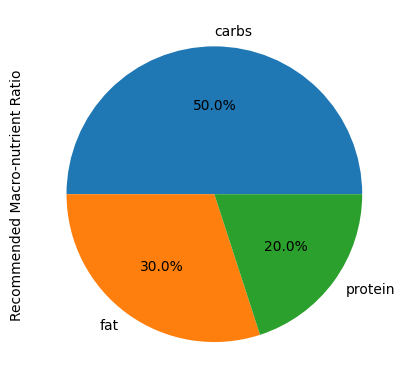

In [14]:
#Calculate macro-nutrient profile and create visualization for national recommendation and for each cuisine
#Recommended
percentages = [50, 30, 20]
labels = ["carbs", "fat", "protein"]

plt.pie(percentages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Recommended Macro-nutrient Ratio")

In [15]:
#American
am_carbs = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "American", 'Carbs/serving']
am_carbs = am_carbs.mean()

am_fat = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "American", 'Fat/serving']
am_fat = am_fat.mean()

am_protein = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "American", 'Protein/serving']
am_protein = am_protein.mean()

am_averages = [am_carbs, am_fat, am_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(am_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("American Cuisine Macro-nutrient Profile")

NameError: name 'recipe_data_2_df' is not defined

Text(0, 0.5, 'Chinese Cuisine Macro-nutrient Profile')

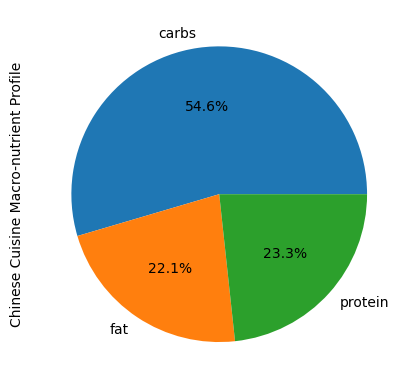

In [ ]:
#Chinese
ch_carbs = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "Chinese", 'Carbs/serving']
ch_carbs = ch_carbs.mean()

ch_fat = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "Chinese", 'Fat/serving']
ch_fat = ch_fat.mean()

ch_protein = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "Chinese", 'Protein/serving']
ch_protein = ch_protein.mean()

ch_averages = [ch_carbs, ch_fat, ch_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(ch_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Chinese Cuisine Macro-nutrient Profile")

Text(0, 0.5, 'Mexican Cuisine Macro-nutrient Profile')

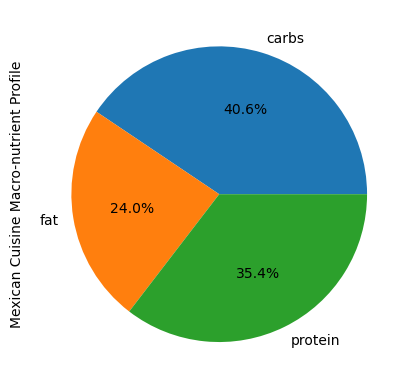

In [ ]:
#Mexican
mx_carbs = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "Mexican", 'Carbs/serving']
mx_carbs = mx_carbs.mean()

mx_fat = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "Mexican", 'Fat/serving']
mx_fat = mx_fat.mean()

mx_protein = recipe_data_2_df.loc[recipe_data_2_df['Cuisine'] == "Mexican", 'Protein/serving']
mx_protein = mx_protein.mean()

mx_averages = [mx_carbs, mx_fat, mx_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(mx_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Mexican Cuisine Macro-nutrient Profile")

# Accessibility

In [ ]:
#Calculate percentage of recipes that contain gluten or dairy and create visualization per cuisine
# (dairy (milk, yogurt, cheese, butter, cream), 
# nuts (almonds, pecans, pistachios, walnuts, peanuts, peanut),
# gluten (wheat, [other grains], all-purpose flour, bread, breadcrumbs, dough)

In [ ]:
#American


In [ ]:
#Chinese

In [ ]:
#Mexican

# Statistical Analysis

In [ ]:
#Organize macro-nutrient profiles from least to most balanced (least to most closely matching UDH's recommendation)


In [ ]:
#Organize accessibility of each cuisine from least to most accessible 
#(highest to lowest percentage of recipes containing major allergens)

In [ ]:
#calculate line regression

#plot scatter plot

In [ ]:
#Identify most balanced and accessible cuisine(s)